Define functions to do the normalisation

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
X = pd.read_csv('/content/world-happiness-report-2021.csv')
X.head()


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
Y = X.filter(["Logged GDP per capita", "Perceptions of corruption" ], axis = 1)

In [ ]:
Y

,Logged GDP per capita,Perceptions of corruption
0,10.775,0.186
1,10.933,0.179
2,11.117,0.292
3,10.878,0.673
4,10.932,0.338
...,...,...
144,7.926,0.915
145,9.782,0.801
146,7.676,0.167
147,7.943,0.821


In [ ]:
Z = X.filter(["Ladder score", "Perceptions of corruption" ])
Z

,Ladder score,Perceptions of corruption
0,7.842,0.186
1,7.620,0.179
2,7.571,0.292
3,7.554,0.673
4,7.464,0.338
...,...,...
144,3.512,0.915
145,3.467,0.801
146,3.415,0.167
147,3.145,0.821


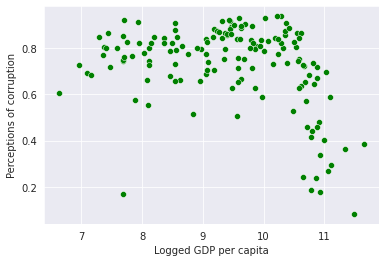

In [ ]:
sns.scatterplot(data = Y, x="Logged GDP per capita", y ="Perceptions of corruption", c = ["green"])

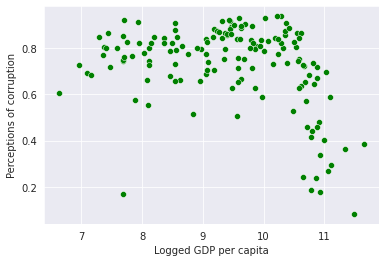

In [ ]:
sns.scatterplot(data = X, x="Logged GDP per capita", y ="Perceptions of corruption", c = ["green"])

In [ ]:
model = KMeans(n_clusters= 5)
model.fit(Y)

KMeans(n_clusters=5)

In [ ]:
KMeans(n_clusters=5)


KMeans(n_clusters=5)

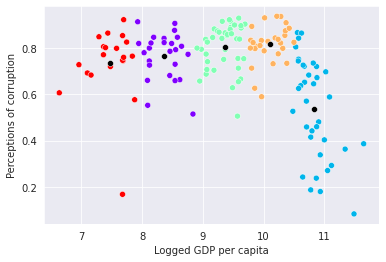

In [ ]:
sns.scatterplot(data = X, x="Logged GDP per capita", y ="Perceptions of corruption", c= model.labels_, cmap= 'rainbow' )

sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], c=['black'])

In [ ]:
import pandas as pd
import numpy as np
import sklearn.cluster as cluster

import matplotlib.pyplot as plt
%matplotlib inline

def norm(array):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled


def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [ ]:
df_fish = Y
print(df_fish.describe())
print(df_fish.corr())
print()

# normalise result and inspect results
df_fish = norm_df(df_fish)
print(df_fish.describe())
print()

       Logged GDP per capita  Perceptions of corruption
count             149.000000                 149.000000
mean                9.432208                   0.727450
std                 1.158601                   0.179226
min                 6.635000                   0.082000
25%                 8.541000                   0.667000
50%                 9.569000                   0.781000
75%                10.421000                   0.845000
max                11.647000                   0.939000
                           Logged GDP per capita  Perceptions of corruption
Logged GDP per capita                   1.000000                  -0.342337
Perceptions of corruption              -0.342337                   1.000000

       Logged GDP per capita  Perceptions of corruption
count             149.000000                 149.000000
mean                9.432208                   0.753150
std                 1.158601                   0.209132
min                 6.635000               

In [ ]:
pip install wbgapi

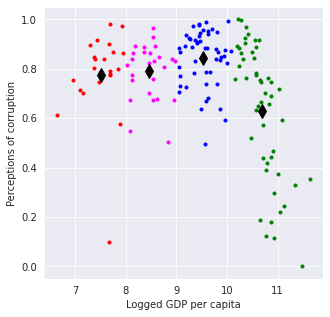

In [ ]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit = df_fish[["Logged GDP per capita", "Perceptions of corruption"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit["Logged GDP per capita"][labels==l], df_fit["Perceptions of corruption"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("Logged GDP per capita")
plt.ylabel("Perceptions of corruption")
plt.show()

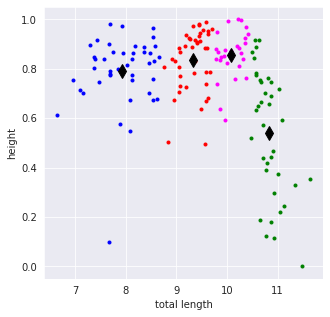

In [ ]:
##### setting up agglomerative clustering for 4 clusters
ac = cluster.AgglomerativeClustering(n_clusters=4)

# carry out the fitting
ac.fit(df_fit)

labels = ac.labels_

# The clusterer does not return cluster centres, but they are easily computed
xcen = []
ycen = []
for ic in range(4):
    xc = np.average(df_fit["Logged GDP per capita"][labels==ic])
    yc = np.average(df_fit["Perceptions of corruption"][labels==ic])
    xcen.append(xc)
    ycen.append(yc)

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(0,4):     # loop over the different labels
    plt.plot(df_fit["Logged GDP per capita"][labels==l], df_fit["Perceptions of corruption"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    plt.plot(xcen[ic], ycen[ic], "dk", markersize=10)
    
plt.xlabel("total length")
plt.ylabel("height")
plt.show()


###### writing labels into df_fish, sorting and exporting as excel file
df_fish["labels"] = labels
df_fish = df_fish.sort_values(["labels"], ignore_index=True)


In [ ]:

def exp_growth(t, scale, growth):
    """ Computes exponential function with scale and growth as free parameters
    """
    
    f = scale * np.exp(growth * (t-1950)) 
    
    return f
        

def logistics(t, scale, growth, t0):
    """ Computes logistics function with scale, growth raat
    and time of the turning point as free parameters
    """
    
    f = scale / (1.0 + np.exp(-growth * (t - t0)))
    
    return f

In [ ]:
df_pop = pd.read_csv("/content/world_ind_pop_data.csv")

# have a look
print(df_pop)

                                   CountryName CountryCode  Year  \
0                                   Arab World         ARB  1960   
1                       Caribbean small states         CSS  1960   
2               Central Europe and the Baltics         CEB  1960   
3      East Asia & Pacific (all income levels)         EAS  1960   
4        East Asia & Pacific (developing only)         EAP  1960   
...                                        ...         ...   ...   
13369                    Virgin Islands (U.S.)         VIR  2014   
13370                       West Bank and Gaza         WBG  2014   
13371                              Yemen, Rep.         YEM  2014   
13372                                   Zambia         ZMB  2014   
13373                                 Zimbabwe         ZWE  2014   

       Total Population  Urban population (% of total)  
0          9.249590e+07                      31.285384  
1          4.190810e+06                      31.597490  
2          9

In [ ]:
# fit exponential growth
import scipy.optimize as opt
popt, covar = opt.curve_fit(exp_growth, df_pop["Year"], 
                            df_pop["Urban population (% of total)"])

Fit parameter [-5.87470475e-15  1.00000000e+00]


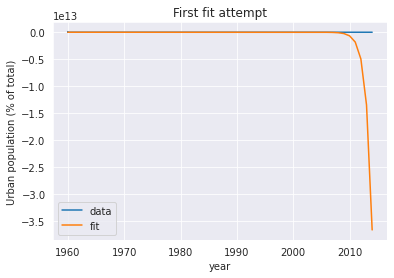

In [ ]:
print("Fit parameter", popt)

# use *popt to pass on the fit parameters
df_pop["pop_exp"] = exp_growth(df_pop["Year"], *popt)




plt.figure()
plt.plot(df_pop["Year"], df_pop["Urban population (% of total)"], label="data")
plt.plot(df_pop["Year"], df_pop["pop_exp"], label="fit")




plt.legend()
plt.title("First fit attempt")
plt.xlabel("year")
plt.ylabel("Urban population (% of total)")
plt.show()
print()

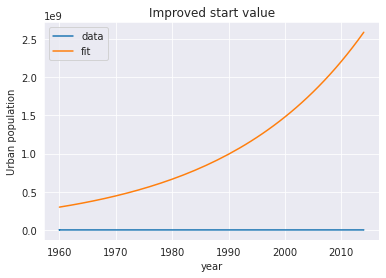

In [57]:
# find a feasible start value the pedestrian way
# the scale factor is way too small. The exponential factor too large. 
# Try scaling with the 1960 urban population and a smaller exponential factor
# decrease or increase exponential factor until rough agreement is reached

popt = [2e8, 0.04]
df_pop["pop_exp"] = exp_growth(df_pop["Year"], *popt)

plt.figure()
plt.plot(df_pop["Year"], df_pop["Urban population (% of total)"], label="data")
plt.plot(df_pop["Year"], df_pop["pop_exp"], label="fit")

plt.legend()
plt.xlabel("year")
plt.ylabel("Urban population")
plt.title("Improved start value")
plt.show()


Fit parameter [6.44612320e+01 3.62630989e-02 1.95324024e+03]


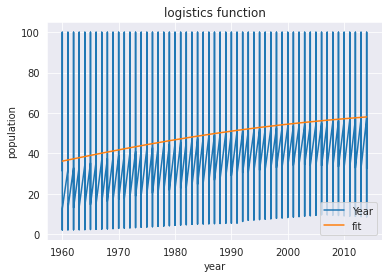

In [61]:
popt, covar = opt.curve_fit(logistics, df_pop["Year"], df_pop["Urban population (% of total)"], 
                            p0=(2e9, 0.05, 1990.0))
print("Fit parameter", popt)
      
df_pop["pop_log"] = logistics(df_pop["Year"], *popt)

plt.figure()
plt.title("logistics function")
plt.plot(df_pop["Year"], df_pop["Urban population (% of total)"], label="Year")
plt.plot(df_pop["Year"], df_pop["pop_log"], label="fit")

plt.legend()
plt.xlabel("year")
plt.ylabel("population")
plt.show()


In [ ]:
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   



[2.58480491 0.00489522 1.4237261 ]


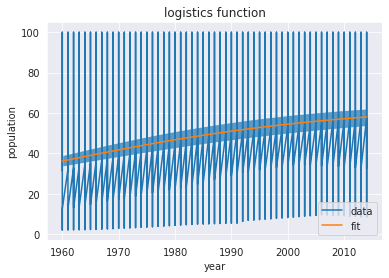

In [ ]:
# extract the sigmas from the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(covar))
print(sigma)

low, up = err_ranges(df_pop["Year"], logistics, popt, sigma)

plt.figure()
plt.title("logistics function")
plt.plot(df_pop["Year"], df_pop["Urban population (% of total)"], label="data")
plt.plot(df_pop["Year"], df_pop["pop_log"], label="fit")

plt.fill_between(df_pop["Year"], low, up, alpha=0.7)
plt.legend()
plt.xlabel("year")
plt.ylabel("population")
plt.show()

In [ ]:
def err_ranges(x, func, param, sigma):
    
    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   

In [ ]:
print("Forcasted population")
low, up = err_ranges(2030, logistics, popt, sigma)
print("2030 between ", low, "and", up)
low, up = err_ranges(2040, logistics, popt, sigma)
print("2040 between ", low, "and", up)
low, up = err_ranges(2050, logistics, popt, sigma)
print("2050 between ", low, "and", up)

Forcasted population
2030 between  56.55334332078222 and 64.46492421918052
2040 between  57.8943279846706 and 65.31328372734191
2050 between  58.91518233348309 and 65.88781444229657


In [ ]:
print("Forcasted population")
low, up = err_ranges(2030, logistics, popt, sigma)
mean = (up+low) / 2.0
pm = (up-low) / 2.0
print("2030:", mean, "+/-", pm)

low, up = err_ranges(2040, logistics, popt, sigma)
mean = (up+low) / 2.0
pm = (up-low) / 2.0
print("2040:", mean, "+/-", pm)

low, up = err_ranges(2050, logistics, popt, sigma)
mean = (up+low) / 2.0
pm = (up-low) / 2.0
print("2050:", mean, "+/-", pm)

Forcasted population
2030: 60.50913376998137 +/- 3.9557904491991494
2040: 61.60380585600626 +/- 3.709477871335654
2050: 62.40149838788983 +/- 3.4863160544067426


No handles with labels found to put in legend.


[2.58480491 0.00489522 1.4237261 ]


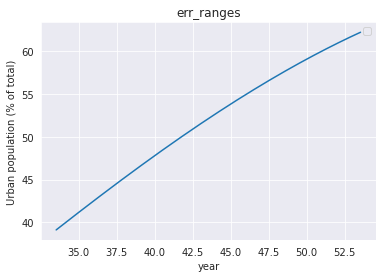

In [ ]:
sigma = np.sqrt(np.diag(covar))
print(sigma)

low, up = err_ranges(df_pop["Year"], logistics, popt, sigma)

plt.figure()
plt.title("err_ranges")
plt.plot(low, up)
#plt.plot(df_pop["Year"], df_pop["pop"], label="fit")


plt.legend()
plt.xlabel("year")
plt.ylabel("Urban population (% of total)")
plt.show()

Read in and normalise